In [1]:
import os
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties 
import librosa
import librosa.display
import pandas as pd
import numpy as np
from scipy import signal
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
def drawSpec(file_name, ax):
    data, fs = librosa.load(file_name, sr=44100)
    data = data[:int(len(data)/10)]
    DMatrix = librosa.stft(data, n_fft=2048, hop_length=int(2048 * 0.1), window='hann')
    dbMatrix = librosa.amplitude_to_db(np.abs(DMatrix), ref=np.max)
    img = librosa.display.specshow(dbMatrix, sr=fs, n_fft=2048, hop_length=int(2048 * 0.1), y_axis='linear', x_axis='time', ax=ax)
    ax.label_outer()
    return img

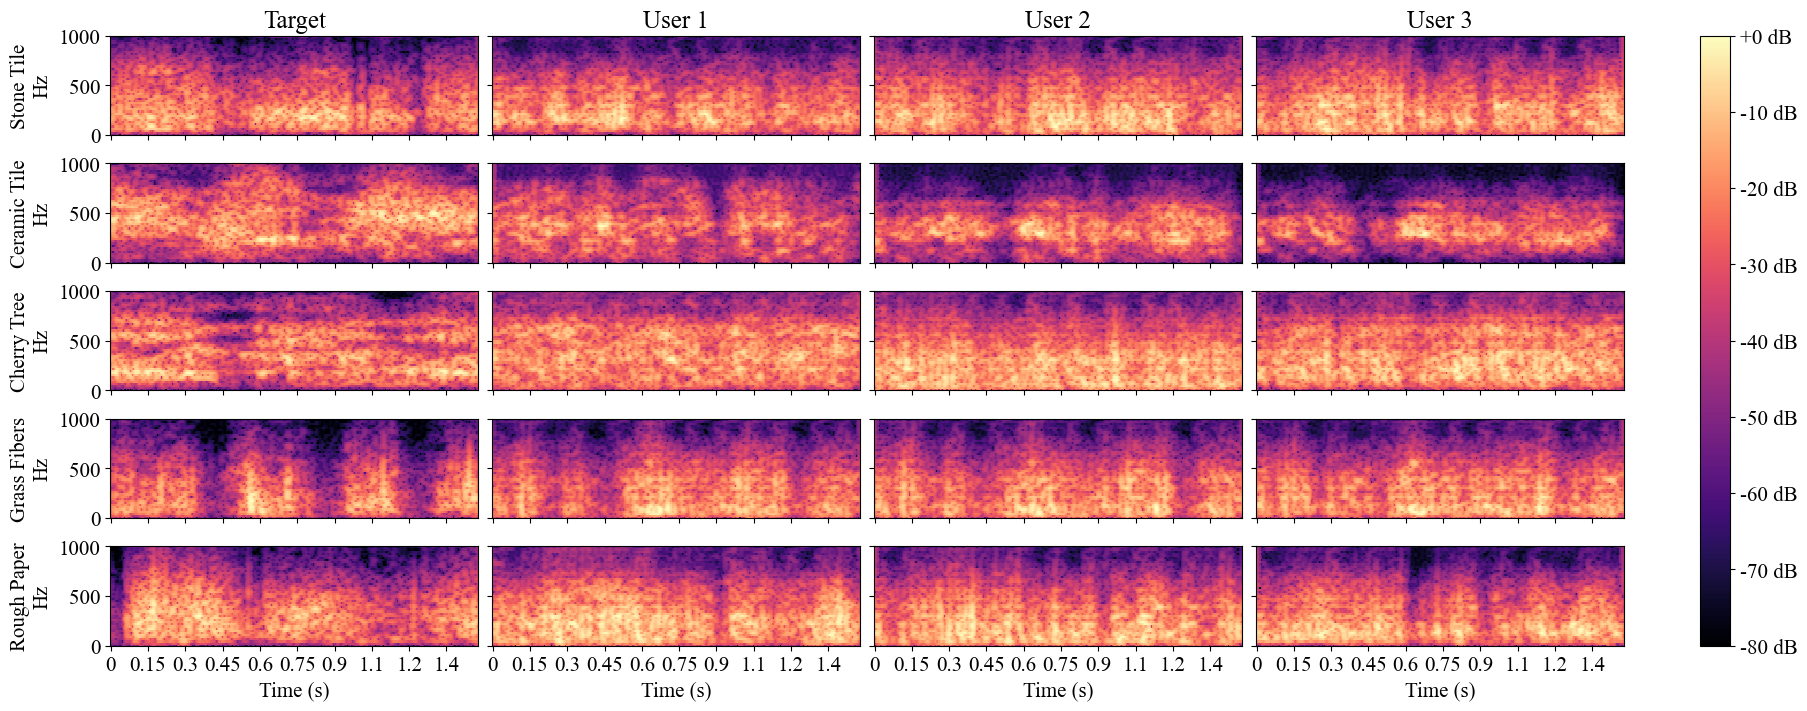

In [3]:
params={'font.family':'serif',
        'font.serif':'Times New Roman',
        'font.style':'normal',
        'font.weight':'normal',
        'font.size':15.
        }
plt.rcParams.update(params)
fig, ax = plt.subplots(5, 4, sharex=True, sharey=True, figsize=(18, 7), layout='compressed')

img = drawSpec('Reference_Waves/G2_2.wav', ax[0, 0])
ax[0, 0].set_title('Target')
ax[0, 0].set_ylabel('Stone Tile\nHz')
drawSpec('Generated_Waves/0118/G2_2_20240118183305.wav', ax[0, 1])
ax[0, 1].set_title('User 1')
drawSpec('Generated_Waves/0124/G2_2_20240124161123.wav', ax[0, 2])
ax[0, 2].set_title('User 2')
drawSpec('Generated_Waves/0321/G2_2_20240321153256.wav', ax[0, 3])
ax[0, 3].set_title('User 3')

drawSpec('Reference_Waves/G3_3.wav', ax[1, 0])
ax[1, 0].set_ylabel('Ceramic Tile\nHz')
drawSpec('Generated_Waves/0118/G3_3_20240119190843.wav', ax[1, 1])
drawSpec('Generated_Waves/0124/G3_3_20240124145902.wav', ax[1, 2])
drawSpec('Generated_Waves/0321/G3_3_20240321164617.wav', ax[1, 3])

drawSpec('Reference_Waves/G4_3.wav', ax[2, 0])
ax[2, 0].set_ylabel('Cherry Tree\nHz')
drawSpec('Generated_Waves/0118/G4_3_20240119192755.wav', ax[2, 1])
drawSpec('Generated_Waves/0124/G4_3_20240124153809.wav', ax[2, 2])
drawSpec('Generated_Waves/0321/G4_3_20240321172644.wav', ax[2, 3])

drawSpec('Reference_Waves/G6_3.wav', ax[3, 0])
ax[3, 0].set_ylabel('Grass Fibers\nHz')
drawSpec('Generated_Waves/0118/G6_3_20240120140447.wav', ax[3, 1])
drawSpec('Generated_Waves/0124/G6_3_20240124154515.wav', ax[3, 2])
drawSpec('Generated_Waves/0321/G6_3_20240321174512.wav', ax[3, 3])

drawSpec('Reference_Waves/G8_3.wav', ax[4, 0])
ax[4, 0].set_ylabel('Rough Paper\nHz')
ax[4, 0].set_xlabel('Time (s)')
drawSpec('Generated_Waves/0118/G8_3_20240121165932.wav', ax[4, 1])
ax[4, 1].set_xlabel('Time (s)')
drawSpec('Generated_Waves/0124/G8_3_20240124160430.wav', ax[4, 2])
ax[4, 2].set_xlabel('Time (s)')
drawSpec('Generated_Waves/0321/G8_3_20240321181028.wav', ax[4, 3])
ax[4, 3].set_xlabel('Time (s)')


plt.ylim(0, 1000)
fig.colorbar(img, ax=ax, format="%+2.0f dB")
plt.savefig("GenerationResults.png", dpi=300)


In [4]:
conf_matrix_g = np.zeros([5, 5], dtype=np.int64)
results_path = 'Evaluation_Results'
dir_list = os.listdir(results_path)
for dir in dir_list:
    if os.path.basename(dir)[0:8] == 'cm_cross':
        file = os.path.join(results_path, dir)
        conf_matrix_g += np.array(pd.read_csv(file, index_col=0))

conf_matrix_g = conf_matrix_g / sum(conf_matrix_g[0,:])

In [5]:
conf_matrix_r = np.zeros([5, 5], dtype=np.int64)
results_path = 'Evaluation_Results'
dir_list = os.listdir(results_path)
for dir in dir_list:
    if os.path.basename(dir)[0:7] == 'cm_real':
        file = os.path.join(results_path, dir)
        conf_matrix_r += np.array(pd.read_csv(file, index_col=0))
        
conf_matrix_r = conf_matrix_r / sum(conf_matrix_r[0,:])

Chi2 Statistic: 6.196117266136493
P-value: 0.9858351706018657
Degrees of Freedom: 16
Expected Frequencies:
[[0.29222222 0.21222222 0.18666667 0.16333333 0.14555556]
 [0.29222222 0.21222222 0.18666667 0.16333333 0.14555556]
 [0.29222222 0.21222222 0.18666667 0.16333333 0.14555556]
 [0.29222222 0.21222222 0.18666667 0.16333333 0.14555556]
 [0.29222222 0.21222222 0.18666667 0.16333333 0.14555556]]
无法拒绝原假设，没有足够证据表明实际结果与预测结果之间有显著差异。
0.558888888888889


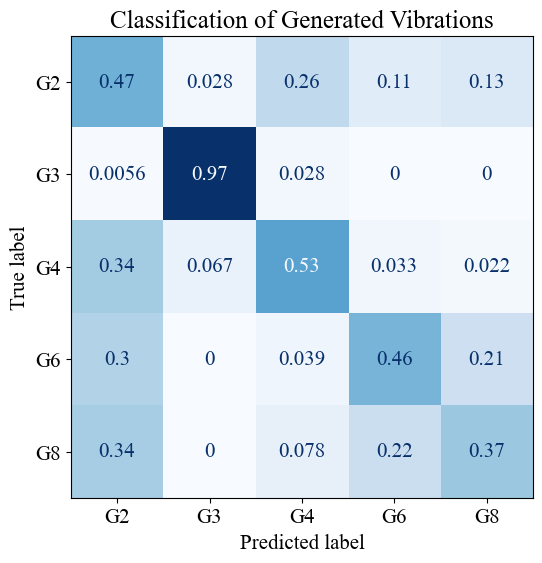

In [6]:
from scipy.stats import chi2_contingency

# chi2_contingency
chi2, p, dof, expected = chi2_contingency(conf_matrix_g)

print(f"Chi2 Statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)

alpha = 0.05
if p < alpha:
    print("拒绝原假设，实际结果与预测结果之间有显著差异。")
else:
    print("无法拒绝原假设，没有足够证据表明实际结果与预测结果之间有显著差异。")
    
cm = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_g,
                            display_labels=['G2', 'G3', 'G4', 'G6', 'G8'])

print(np.diagonal(conf_matrix_g).sum() / conf_matrix_g.sum())

fig, ax = plt.subplots(figsize=(6, 6))
plt.title('Classification of Generated Vibrations')

cm.plot(
    include_values=True,
    cmap="Blues",
    colorbar=False,
    ax=ax,
    xticks_rotation="horizontal",
    # values_format='d'
)

plt.savefig('ClassificationG.png', dpi = 300)

Chi2 Statistic: 9.801465496609897
P-value: 0.8767884659173946
Degrees of Freedom: 16
Expected Frequencies:
[[0.16666667 0.20111111 0.22444444 0.19       0.21777778]
 [0.16666667 0.20111111 0.22444444 0.19       0.21777778]
 [0.16666667 0.20111111 0.22444444 0.19       0.21777778]
 [0.16666667 0.20111111 0.22444444 0.19       0.21777778]
 [0.16666667 0.20111111 0.22444444 0.19       0.21777778]]
无法拒绝原假设，没有足够证据表明实际结果与预测结果之间有显著差异。
0.7277777777777779


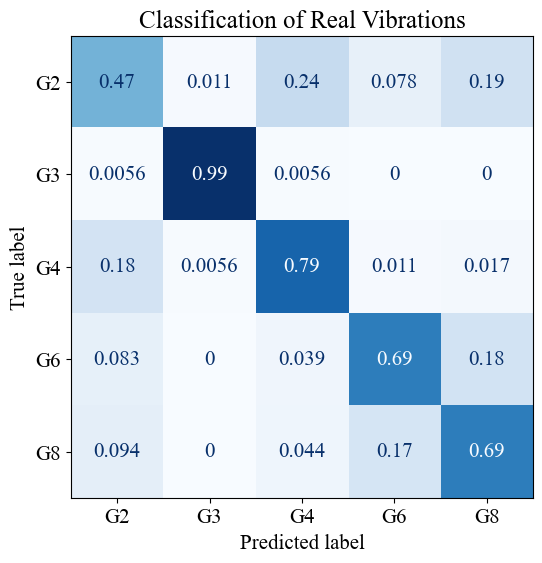

In [7]:
# 执行卡方检验
chi2, p, dof, expected = chi2_contingency(conf_matrix_r)

print(f"Chi2 Statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)

alpha = 0.05
if p < alpha:
    print("拒绝原假设，实际结果与预测结果之间有显著差异。")
else:
    print("无法拒绝原假设，没有足够证据表明实际结果与预测结果之间有显著差异。")
    
cm = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_r,
                            display_labels=['G2', 'G3', 'G4', 'G6', 'G8'])

print(np.diagonal(conf_matrix_r).sum() / conf_matrix_r.sum())

fig, ax = plt.subplots(figsize=(6, 6))
plt.title('Classification of Real Vibrations')

cm.plot(
    include_values=True,
    cmap="Blues",
    colorbar=False,
    ax=ax,
    xticks_rotation="horizontal",
    # values_format="d"
)

plt.savefig('ClassificationR.png', dpi = 300)

0.45555555555555555


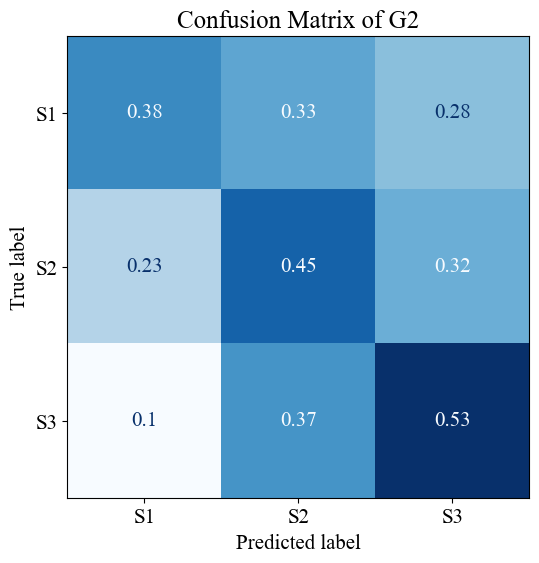

In [8]:
conf_matrix_g2 = np.zeros([3, 3], dtype=np.int64)
results_path = 'Evaluation_Results'
dir_list = os.listdir(results_path)
for dir in dir_list:
    if os.path.basename(dir)[0:13] == 'cm_inclass_G2':
        file = os.path.join(results_path, dir)
        conf_matrix_g2 += np.array(pd.read_csv(file, index_col=0))

conf_matrix_g2 = conf_matrix_g2 / sum(conf_matrix_g2[0,:])

cm = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_g2,
                            display_labels=['S1', 'S2', 'S3'])

print(np.diagonal(conf_matrix_g2).sum() / conf_matrix_g2.sum())

fig, ax = plt.subplots(figsize=(6, 6))
plt.title('Confusion Matrix of G2')

cm.plot(
    include_values=True,
    cmap="Blues",
    colorbar=False,
    ax=ax,
    xticks_rotation="horizontal"
)

0.4611111111111111


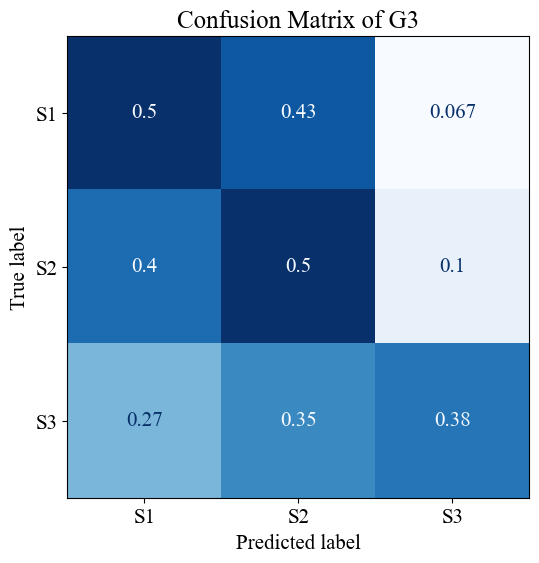

In [9]:
conf_matrix_g3 = np.zeros([3, 3], dtype=np.int64)
results_path = 'Evaluation_Results'
dir_list = os.listdir(results_path)
for dir in dir_list:
    if os.path.basename(dir)[0:13] == 'cm_inclass_G3':
        file = os.path.join(results_path, dir)
        conf_matrix_g3 += np.array(pd.read_csv(file, index_col=0))
        
conf_matrix_g3 = conf_matrix_g3 / sum(conf_matrix_g3[0,:])

cm = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_g3,
                            display_labels=['S1', 'S2', 'S3'])

print(np.diagonal(conf_matrix_g3).sum() / conf_matrix_g3.sum())

fig, ax = plt.subplots(figsize=(6, 6))
plt.title('Confusion Matrix of G3')

cm.plot(
    include_values=True,
    cmap="Blues",
    colorbar=False,
    ax=ax,
    xticks_rotation="horizontal"
)

0.41111111111111115


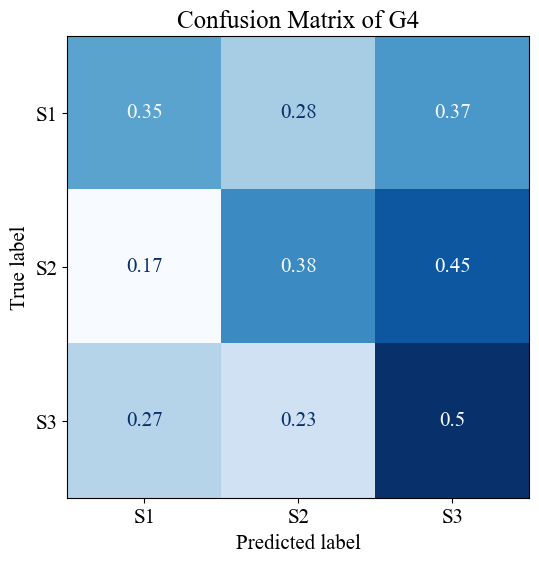

In [10]:
conf_matrix_g4 = np.zeros([3, 3], dtype=np.int64)
results_path = 'Evaluation_Results'
dir_list = os.listdir(results_path)
for dir in dir_list:
    if os.path.basename(dir)[0:13] == 'cm_inclass_G4':
        file = os.path.join(results_path, dir)
        conf_matrix_g4 += np.array(pd.read_csv(file, index_col=0))
        
conf_matrix_g4 = conf_matrix_g4 / sum(conf_matrix_g4[0,:])

cm = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_g4,
                            display_labels=['S1', 'S2', 'S3'])

print(np.diagonal(conf_matrix_g4).sum() / conf_matrix_g4.sum())

fig, ax = plt.subplots(figsize=(6, 6))
plt.title('Confusion Matrix of G4')

cm.plot(
    include_values=True,
    cmap="Blues",
    colorbar=False,
    ax=ax,
    xticks_rotation="horizontal"
)

0.3611111111111111


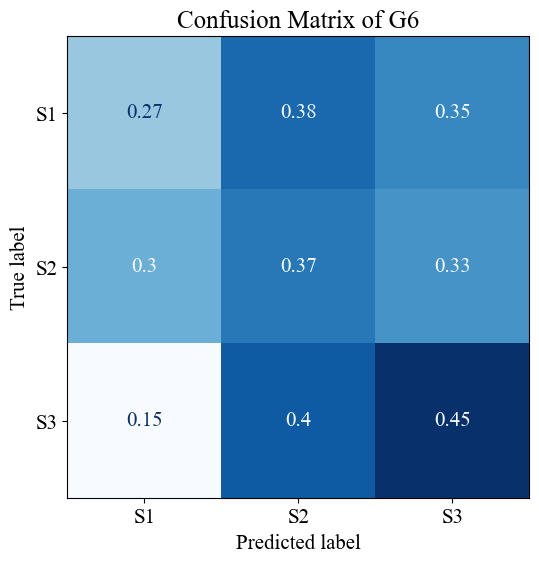

In [11]:
conf_matrix_g6 = np.zeros([3, 3], dtype=np.int64)
results_path = 'Evaluation_Results'
dir_list = os.listdir(results_path)
for dir in dir_list:
    if os.path.basename(dir)[0:13] == 'cm_inclass_G6':
        file = os.path.join(results_path, dir)
        conf_matrix_g6 += np.array(pd.read_csv(file, index_col=0))
        
conf_matrix_g6 = conf_matrix_g6 / sum(conf_matrix_g6[0,:])

cm = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_g6,
                            display_labels=['S1', 'S2', 'S3'])

print(np.diagonal(conf_matrix_g6).sum() / conf_matrix_g6.sum())

fig, ax = plt.subplots(figsize=(6, 6))
plt.title('Confusion Matrix of G6')

cm.plot(
    include_values=True,
    cmap="Blues",
    colorbar=False,
    ax=ax,
    xticks_rotation="horizontal"
)

0.42222222222222217


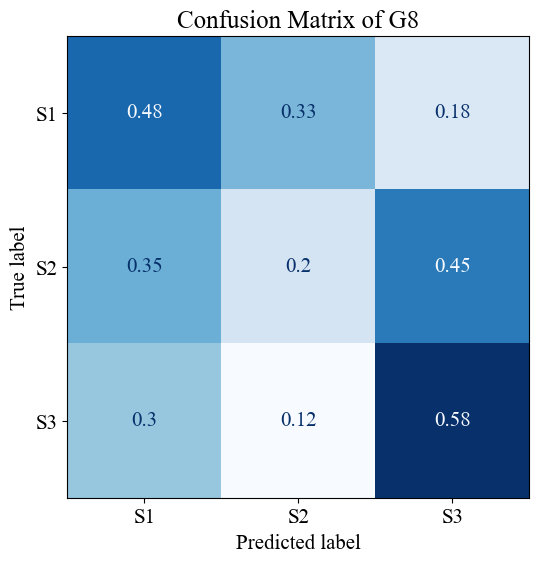

In [12]:
conf_matrix_g8 = np.zeros([3, 3], dtype=np.int64)
results_path = 'Evaluation_Results'
dir_list = os.listdir(results_path)
for dir in dir_list:
    if os.path.basename(dir)[0:13] == 'cm_inclass_G8':
        file = os.path.join(results_path, dir)
        conf_matrix_g8 += np.array(pd.read_csv(file, index_col=0))
        
conf_matrix_g8 = conf_matrix_g8 / sum(conf_matrix_g8[0,:])

cm = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_g8,
                            display_labels=['S1', 'S2', 'S3'])

print(np.diagonal(conf_matrix_g8).sum() / conf_matrix_g8.sum())

fig, ax = plt.subplots(figsize=(6, 6))
plt.title('Confusion Matrix of G8')

cm.plot(
    include_values=True,
    cmap="Blues",
    colorbar=False,
    ax=ax,
    xticks_rotation="horizontal"
)

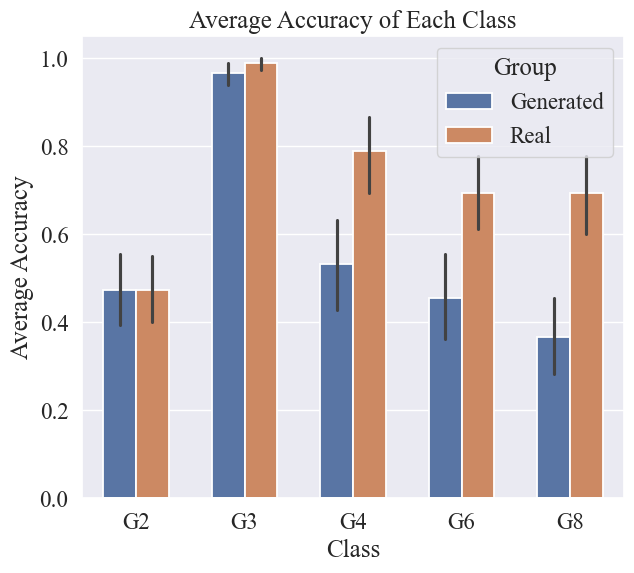

In [48]:
import seaborn as sns
sns.set_theme(font='Times New Roman', font_scale=1.5)

df_avgacc = {'Class': [],
             'Group': [],
             'Average Accuracy': []}

class_list = ['G2', 'G3', 'G4', 'G6', 'G8']

results_path = 'Evaluation_Results'
dir_list = os.listdir(results_path)
for dir in dir_list:
    if os.path.basename(dir)[0:8] == 'cm_cross':
        file = os.path.join(results_path, dir)
        cm = np.array(pd.read_csv(file, index_col=0))
        
        for i in range(5):
            df_avgacc['Class'].append(class_list[i])
            df_avgacc['Group'].append('Generated')
            avgacc = cm[i][i] / sum(cm[0,:])
            df_avgacc['Average Accuracy'].append(avgacc)

    elif os.path.basename(dir)[0:7] == 'cm_real':
        file = os.path.join(results_path, dir)
        cm = np.array(pd.read_csv(file, index_col=0))
        
        for i in range(5):
            df_avgacc['Class'].append(class_list[i])
            df_avgacc['Group'].append('Real')
            avgacc = cm[i][i] / sum(cm[0,:])
            df_avgacc['Average Accuracy'].append(avgacc)
        
df_avgacc = pd.DataFrame(df_avgacc)

plt.figure(figsize=(7, 6))
plt.title('Average Accuracy of Each Class')
sns.barplot(x="Class", y="Average Accuracy", data=df_avgacc, hue="Group", width=0.6, linewidth=1.3)
plt.savefig('ClassAccuracy.png', dpi = 300)

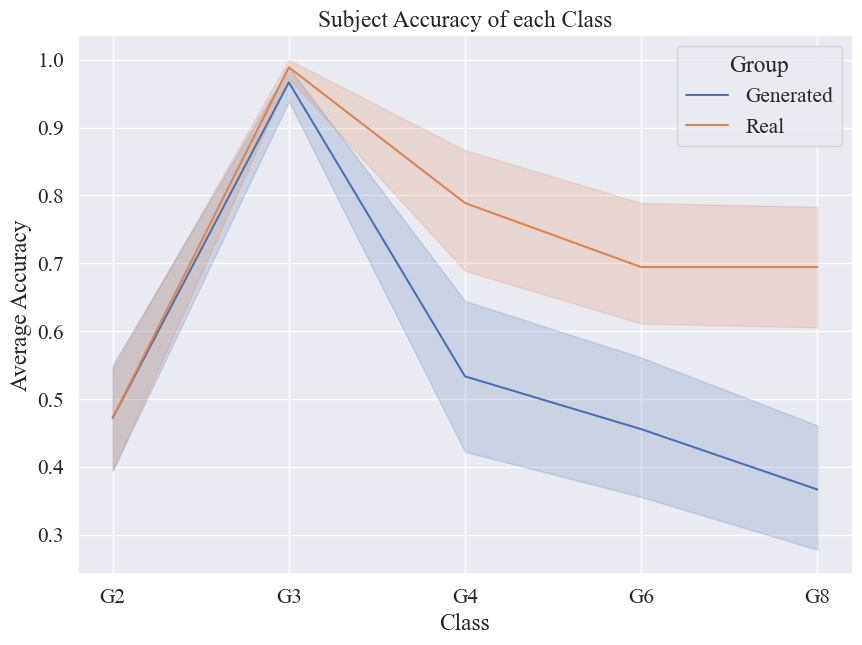

In [38]:
plt.figure(figsize=(10, 7))
plt.title('Subject Accuracy of each Class')
sns.lineplot(x="Class", y="Average Accuracy", data=df_avgacc, hue="Group")
plt.show()

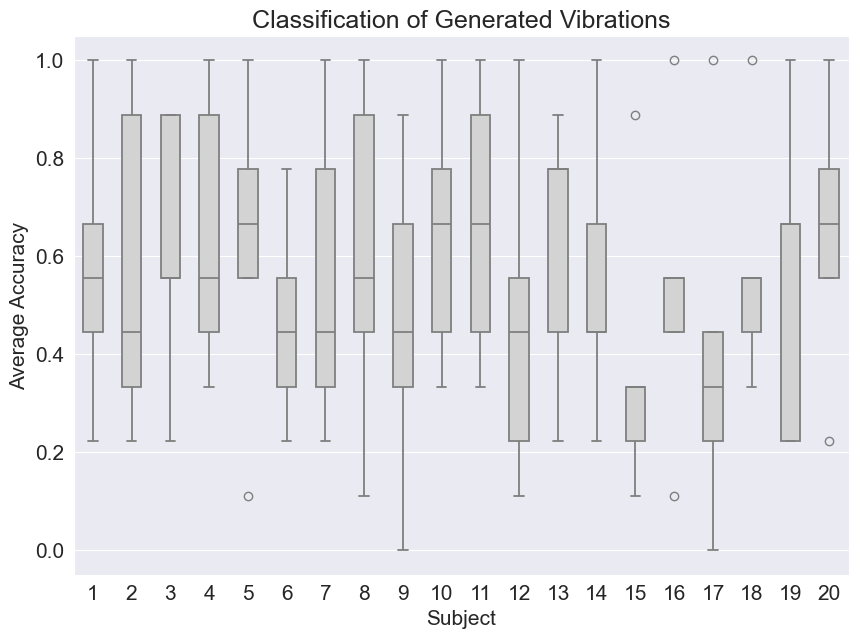

In [15]:
df_avgacc_g = {'Subject': [],
            'Time': [],
            'Class': [],
            'Group': [],
            'Average Accuracy': [],
            'id': []}

class_list = ['G2', 'G3', 'G4', 'G6', 'G8']

results_path = 'Evaluation_Results'
dir_list = os.listdir(results_path)
subject = 1
for dir in dir_list:
    if os.path.basename(dir)[0:8] == 'cm_cross':
        file = os.path.join(results_path, dir)
        cm = np.array(pd.read_csv(file, index_col=0))
        
        for i in range(5):
            df_avgacc_g['Class'].append(class_list[i])
            df_avgacc_g['Group'].append('Generated')
            df_avgacc_g['Time'].append(os.path.basename(dir)[9:-4])
            avgacc = cm[i][i] / sum(cm[0,:])
            df_avgacc_g['Average Accuracy'].append(avgacc)
            df_avgacc_g['Subject'].append(subject)
            df_avgacc_g['id'].append(str(subject)+class_list[i])
        subject += 1
        
df_avgacc_g = pd.DataFrame(df_avgacc_g)

plt.figure(figsize=(10, 7))
plt.title('Classification of Generated Vibrations')
sns.boxplot(x="Subject", y="Average Accuracy", data=df_avgacc_g, width=0.5, linewidth=1.3, color="lightgrey")
plt.show()

df_avgacc_g.to_csv('AccuracyTableG.csv')

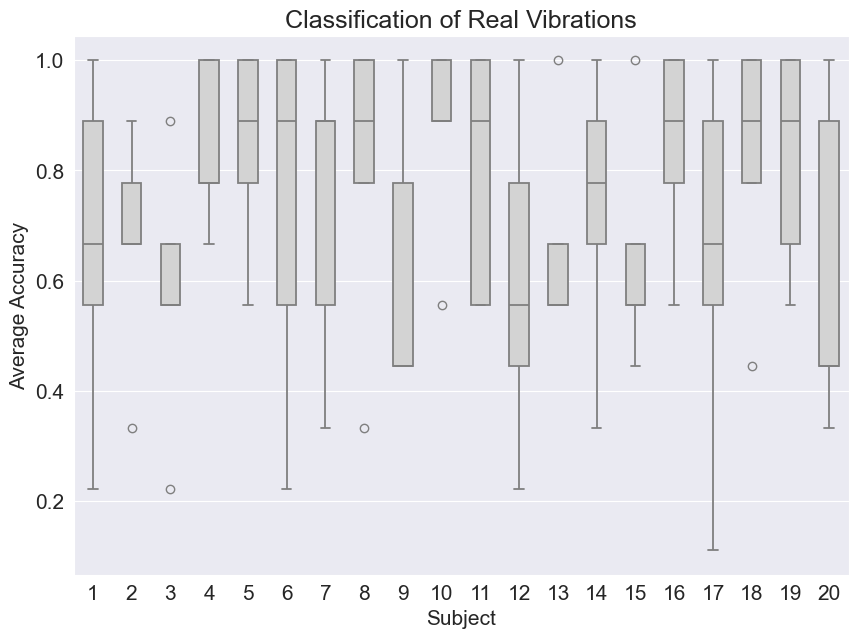

In [16]:
df_avgacc_r = {'Subject': [],
            'Time': [],
            'Class': [],
            'Group': [],
            'Average Accuracy': [],
            'id': []}

class_list = ['G2', 'G3', 'G4', 'G6', 'G8']

results_path = 'Evaluation_Results'
dir_list = os.listdir(results_path)
subject = 1
for dir in dir_list:
    if os.path.basename(dir)[0:7] == 'cm_real':
        file = os.path.join(results_path, dir)
        cm = np.array(pd.read_csv(file, index_col=0))
        
        for i in range(5):
            df_avgacc_r['Class'].append(class_list[i])
            df_avgacc_r['Group'].append('Real')
            df_avgacc_r['Time'].append(os.path.basename(dir)[8:-4])
            avgacc = cm[i][i] / sum(cm[0,:])
            df_avgacc_r['Average Accuracy'].append(avgacc)
            df_avgacc_r['Subject'].append(subject)
            df_avgacc_r['id'].append(str(subject)+class_list[i])
        subject += 1
        
df_avgacc_r = pd.DataFrame(df_avgacc_r)

plt.figure(figsize=(10, 7))
plt.title('Classification of Real Vibrations')
sns.boxplot(x="Subject", y="Average Accuracy", data=df_avgacc_r, width=0.5, linewidth=1.3, color="lightgrey")
plt.show()

df_avgacc_r.to_csv('AccuracyTableR.csv')

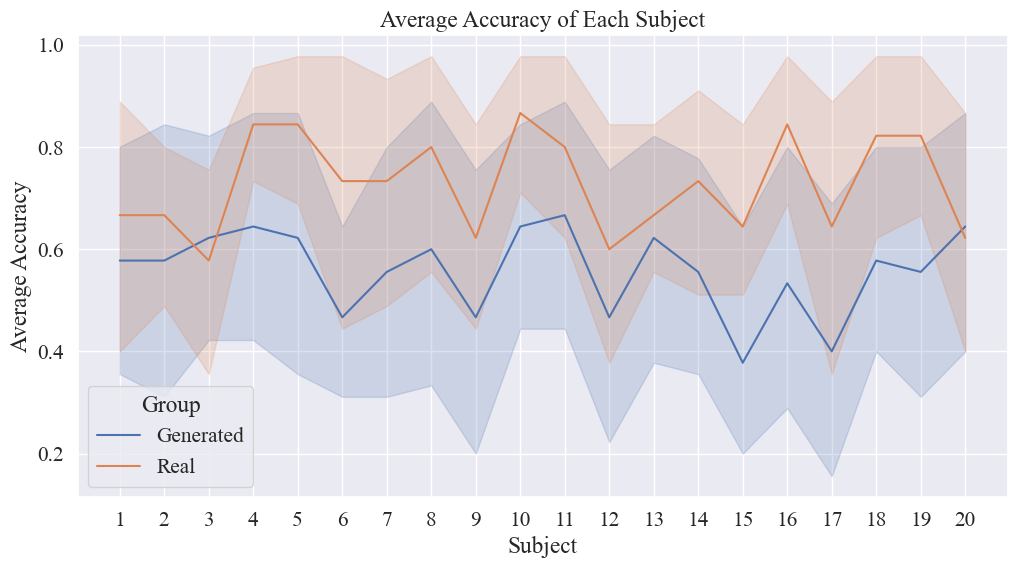

In [45]:
plt.figure(figsize=(12, 6))
df_avgacc = pd.concat([df_avgacc_g, df_avgacc_r])
df_avgacc.to_csv('Accuracy.csv')
sns.lineplot(x="Subject", y="Average Accuracy", data=df_avgacc, hue="Group")
plt.xticks(list(range(1, 21)))
plt.title('Average Accuracy of Each Subject')
plt.savefig('SubjectAccuracy.png', dpi = 300)

In [18]:
acc_g = df_avgacc_g.groupby('Subject')['Average Accuracy'].mean()
acc_r = df_avgacc_r.groupby('Subject')['Average Accuracy'].mean()
acc = pd.DataFrame({'Subject': acc_g.index, 'Acc_G': acc_g.values, 'Acc_R': acc_r.values}).to_csv('acc_list.csv')

In [19]:
from itertools import chain

df_avgacc = pd.concat([df_avgacc_g, df_avgacc_r])

acc = df_avgacc_g.groupby('Subject')['Average Accuracy'].mean()
acc_sorted = acc.sort_values()

subject_order = acc_sorted.index.tolist()
df_avgacc.index = df_avgacc['Subject']
df_avgacc = df_avgacc.loc[subject_order]
df_avgacc['Subject'] = list(chain.from_iterable([[i] * 10 for i in range(1, 21)]))
df_avgacc

,Subject,Time,Class,Group,Average Accuracy,id
Subject,,,,,,
15,1,20240529143354,G2,Generated,0.111111,15G2
15,1,20240529143354,G3,Generated,0.888889,15G3
15,1,20240529143354,G4,Generated,0.333333,15G4
15,1,20240529143354,G6,Generated,0.222222,15G6
15,1,20240529143354,G8,Generated,0.333333,15G8
...,...,...,...,...,...,...
11,20,20240527171655,G2,Real,0.555556,11G2
11,20,20240527171655,G3,Real,1.000000,11G3
11,20,20240527171655,G4,Real,0.888889,11G4


([<matplotlib.axis.XTick at 0x25c047f4580>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20')])

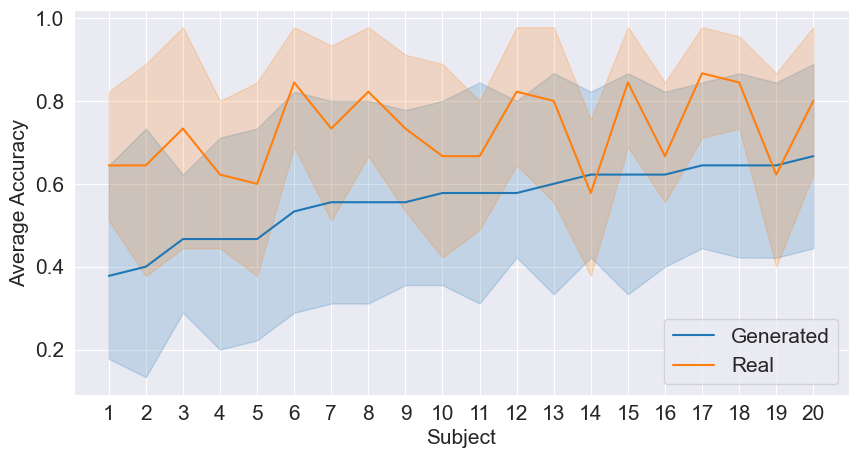

In [20]:
plt.figure(figsize=(10, 5))
sns.set_style("darkgrid")
sns.lineplot(x=df_avgacc['Subject'], y='Average Accuracy', hue='Group', data=df_avgacc, sort=False)
plt.legend(loc='lower right')
plt.xticks(list(range(1, 21)))

([<matplotlib.axis.XTick at 0x25c06c5f970>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20')])

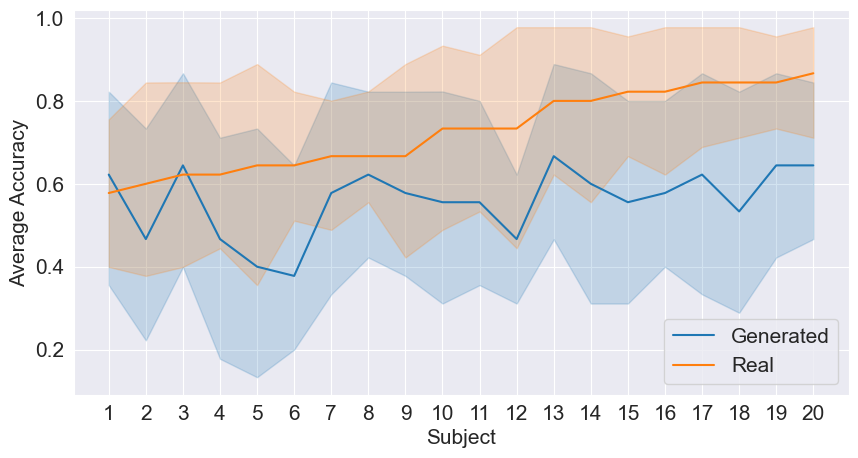

In [21]:
df_avgacc = pd.concat([df_avgacc_g, df_avgacc_r])

acc = df_avgacc_r.groupby('Subject')['Average Accuracy'].mean()
acc_sorted = acc.sort_values()

subject_order = acc_sorted.index.tolist()
df_avgacc.index = df_avgacc['Subject']
df_avgacc = df_avgacc.loc[subject_order]
df_avgacc['Subject'] = list(chain.from_iterable([[i] * 10 for i in range(1, 21)]))

plt.figure(figsize=(10, 5))
sns.set_style("darkgrid")
sns.lineplot(x=df_avgacc['Subject'], y='Average Accuracy', hue='Group', data=df_avgacc, sort=False)
plt.legend(loc='lower right')
plt.xticks(list(range(1, 21)))